In [1]:
# 加载功能模块
from datetime import datetime

from vnpy.trader.constant import Interval

from elite_optionstrategy import BacktestingEngine

from buy_straddle_strategy import BuyStraddleStrategy

In [2]:
# 创建回测引擎
engine = BacktestingEngine()

engine.set_parameters(
    interval=Interval.MINUTE,
    start=datetime(2022, 1, 1),
    end=datetime(2022, 12, 31),
    rate=0,
    slippage=0.6 + (16 / 100),
)

engine.add_strategy(BuyStraddleStrategy, {})

In [3]:
# 历史数据回放
engine.run_backtesting()

100%|██████████| 364/364 [17:20<00:00,  2.86s/it]


In [4]:
# 计算每日盈亏
engine.calculate_result()

2024-01-21 15:58:29.461196	开始计算逐日盯市盈亏
2024-01-21 15:58:29.465946	逐日盯市盈亏计算完成


trade_count  turnover  commission  slippage  trading_pnl  \
date                                                                   
2022-01-04            2   13600.0         0.0     152.0       -580.0   
2022-01-05            0       0.0         0.0       0.0          0.0   
2022-01-06            0       0.0         0.0       0.0          0.0   
2022-01-07            0       0.0         0.0       0.0          0.0   
2022-01-10            0       0.0         0.0       0.0          0.0   
...                 ...       ...         ...       ...          ...   
2022-12-26            0       0.0         0.0       0.0          0.0   
2022-12-27            0       0.0         0.0       0.0          0.0   
2022-12-28            0       0.0         0.0       0.0          0.0   
2022-12-29            0       0.0         0.0       0.0          0.0   
2022-12-30            0       0.0         0.0       0.0          0.0   

            holding_pnl  total_pnl  net_pnl  
date                                         
2022-01-04          0.0     -580.0   -732.0  
2022-01-05       1440.0     1440.0   1440.0  
2022-01-06       2780.0     2780.0   2780.0  
2022-01-07      -1900.0    -1900.0  -1900.0  
2022-01-10      -1240.0    -1240.0  -1240.0  
...                 ...        ...      ...  
2022-12-26      -1080.0    -1080.0  -1080.0  
2022-12-27      -2960.0    -2960.0  -2960.0  
2022-12-28        360.0      360.0    360.0  
2022-12-29        580.0      580.0    580.0  
2022-12-30      -1540.0    -1540.0  -1540.0  

[242 rows x 8 columns]

In [5]:
# 统计绩效结果
result = engine.calculate_statistics()

2024-01-21 15:58:29.533210	开始计算策略统计指标
2024-01-21 15:58:29.542151	------------------------------
2024-01-21 15:58:29.543186	首个交易日：	2022-01-04 00:00:00
2024-01-21 15:58:29.543186	最后交易日：	2022-12-30 00:00:00
2024-01-21 15:58:29.543186	总交易日：	242
2024-01-21 15:58:29.543186	盈利交易日：	100
2024-01-21 15:58:29.543186	亏损交易日：	142
2024-01-21 15:58:29.543186	起始资金：	1,000,000.00
2024-01-21 15:58:29.543186	结束资金：	977,504.00
2024-01-21 15:58:29.543186	总收益率：	-2.25%
2024-01-21 15:58:29.543186	年化收益：	-2.23%
2024-01-21 15:58:29.543186	最大回撤: 	-94,112.00
2024-01-21 15:58:29.543186	最大回撤%: 	-8.89%
2024-01-21 15:58:29.543186	总盈亏：	-22,496.00
2024-01-21 15:58:29.543186	总手续费：	0.00
2024-01-21 15:58:29.543186	总滑点：	1,976.00
2024-01-21 15:58:29.543186	总成交金额：	229,720.00
2024-01-21 15:58:29.543186	总成交笔数：	26
2024-01-21 15:58:29.543186	日均盈亏：	-92.96
2024-01-21 15:58:29.543186	日均手续费：	0.00
2024-01-21 15:58:29.543186	日均滑点：	8.17
2024-01-21 15:58:29.543186	日均成交金额：	949.26
2024-01-21 15:58:29.543186	日均成交笔数：	0.10743801652892562
2024-01-

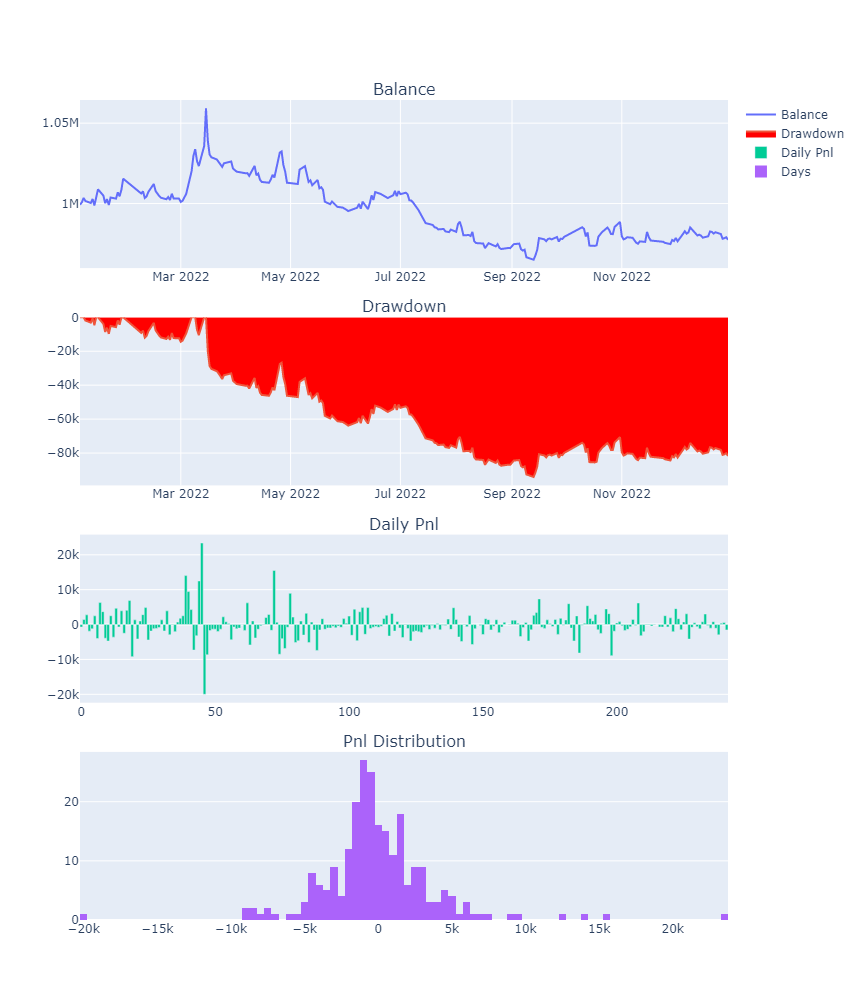

In [6]:
# 显示资金图表
engine.show_chart()

In [7]:
# 打印逐笔成交
for trade in engine.all_trades.values():
    print(trade.datetime, trade.vt_symbol, trade.direction.value, trade.offset.value, trade.volume, "@", trade.price)

2022-01-04 09:31:00+08:00 IO2201-P-4950.CFFEX 多 开 1 @ 63.6
2022-01-04 09:31:00+08:00 IO2201-C-4950.CFFEX 多 开 1 @ 72.4
2022-01-24 09:31:00+08:00 IO2202-P-4800.CFFEX 多 开 1 @ 91.0
2022-01-24 09:31:00+08:00 IO2202-C-4800.CFFEX 多 开 1 @ 74.6
2022-02-21 09:31:00+08:00 IO2203-C-4650.CFFEX 多 开 1 @ 69.2
2022-02-21 09:31:00+08:00 IO2203-P-4650.CFFEX 多 开 1 @ 77.6
2022-03-21 09:31:00+08:00 IO2204-P-4250.CFFEX 多 开 1 @ 113.8
2022-03-21 09:31:00+08:00 IO2204-C-4250.CFFEX 多 开 1 @ 94.0
2022-04-18 09:31:00+08:00 IO2205-C-4150.CFFEX 多 开 1 @ 92.2
2022-04-18 09:31:00+08:00 IO2205-P-4150.CFFEX 多 开 1 @ 110.0
2022-05-23 09:31:00+08:00 IO2206-P-4050.CFFEX 多 开 1 @ 92.4
2022-05-23 09:31:00+08:00 IO2206-C-4050.CFFEX 多 开 1 @ 96.8
2022-06-20 09:31:00+08:00 IO2207-C-4300.CFFEX 多 开 1 @ 95.6
2022-06-20 09:31:00+08:00 IO2207-P-4300.CFFEX 多 开 1 @ 109.8
2022-07-18 09:31:00+08:00 IO2208-P-4250.CFFEX 多 开 1 @ 114.2
2022-07-18 09:31:00+08:00 IO2208-C-4250.CFFEX 多 开 1 @ 97.4
2022-08-22 09:31:00+08:00 IO2209-C-4150.CFFEX 多 开 1 